In [160]:
import joblib
import pandas as pd
from keras.models import load_model
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

# Validasi model

In [161]:
path = "C:/Users/USER/Documents/Kuliah/My Final Destination/Dokumen Teknik/"

data_test = pd.read_csv(path + "Dataset/dataset_test.csv")

robustScaler = joblib.load(path + 'Joblib_RobustScaler.pkl')
labelEncoder = joblib.load(path + 'Joblib_LabelEncoder.pkl')
model = load_model(path + 'Model_ESI_SR_CNN.h5')

In [162]:
like_num = [col for col in data_test.columns if data_test[col].dtypes != 'O' and len(data_test[col].value_counts()) > 10]
cols_need_scale = [col for col in data_test.columns if col not in like_num
                   and col not in 'esi']

print('like_num: ', like_num)
print("cols_need_scale: ", cols_need_scale)

like_num:  ['age', 'triage_vital_hr', 'triage_vital_sbp', 'triage_vital_dbp', 'triage_vital_rr', 'triage_vital_o2', 'triage_vital_temp']
cols_need_scale:  ['gender_Male', 'triage_vital_o2_device_1.0', 'cc_abdominalcramping_1.0', 'cc_abdominaldistention_1.0', 'cc_abdominalpain_1.0', 'cc_abdominalpainpregnant_1.0', 'cc_abnormallab_1.0', 'cc_abscess_1.0', 'cc_addictionproblem_1.0', 'cc_agitation_1.0', 'cc_alcoholintoxication_1.0', 'cc_alcoholproblem_1.0', 'cc_allergicreaction_1.0', 'cc_alteredmentalstatus_1.0', 'cc_animalbite_1.0', 'cc_ankleinjury_1.0', 'cc_anklepain_1.0', 'cc_anxiety_1.0', 'cc_arminjury_1.0', 'cc_armpain_1.0', 'cc_armswelling_1.0', 'cc_assaultvictim_1.0', 'cc_asthma_1.0', 'cc_backpain_1.0', 'cc_bleeding/bruising_1.0', 'cc_blurredvision_1.0', 'cc_bodyfluidexposure_1.0', 'cc_breastpain_1.0', 'cc_breathingdifficulty_1.0', 'cc_breathingproblem_1.0', 'cc_burn_1.0', 'cc_cardiacarrest_1.0', 'cc_cellulitis_1.0', 'cc_chestpain_1.0', 'cc_chesttightness_1.0', 'cc_chills_1.0', 'cc_c

In [163]:
X_test = data_test.drop(columns=['class_0', 'class_1', 'class_2', 'class_3', 'class_4'])
y_test = data_test[['class_0', 'class_1', 'class_2', 'class_3', 'class_4']].values

# Tampilkan DataFrame input
print("X_test Input:")
print(X_test.shape)

# Tampilkan DataFrame target
print("\ny_test Target:")
print(y_test.shape)

X_test Input:
(50871, 209)

y_test Target:
(50871, 5)


In [165]:
label_kelas = ['Level 1', 'Level 2', 'Level 3', 'Level 4', 'Level 5']

# Prediksi dengan model
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Konversi y_test ke bentuk yang sama dengan y_pred_classes
y_test_classes = np.argmax(y_test, axis=1)

1590/1590 [==============================] - 7s 4ms/step


In [166]:
# Evaluasi model dengan data uji
results = model.evaluate(X_test, y_test, batch_size=1024, return_dict=True)

# Ambil nilai akurasi dan AUC dari hasil evaluasi
accuracy = results['accuracy']
model_auc = results['auc']

# Tampilkan hasil evaluasi
print(f"Accuracy: {accuracy}")
print(f"AUC: {model_auc}")

50/50 [==============================] - 2s 30ms/step - loss: 0.6189 - accuracy: 0.8130 - auc: 0.9604
Accuracy: 0.8130172491073608
AUC: 0.9603831171989441


In [167]:
# Buat confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
print(conf_matrix)

[[10148    13     0     0     0]
 [   26  7881  1558   514   147]
 [    6  2208  6016  1816   198]
 [   13   416  1059  7722   869]
 [    7    49    92   521  9592]]


In [168]:
# Buat dan tampilkan laporan klasifikasi
report = classification_report(y_test_classes, y_pred_classes, target_names=label_kelas)
print("\nClassification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

     Level 1       0.99      1.00      1.00     10161
     Level 2       0.75      0.78      0.76     10126
     Level 3       0.69      0.59      0.63     10244
     Level 4       0.73      0.77      0.75     10079
     Level 5       0.89      0.93      0.91     10261

    accuracy                           0.81     50871
   macro avg       0.81      0.81      0.81     50871
weighted avg       0.81      0.81      0.81     50871



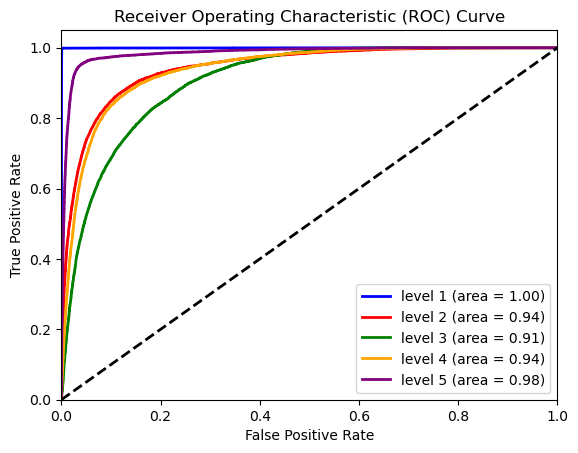

In [169]:
# Plot ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test.shape[1]

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green', 'orange', 'purple']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='level {0} (area = {1:0.2f})'
             ''.format(i + 1, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Mengambil 10 data test untuk simulasi

In [251]:
# Buat salinan dari DataFrame untuk menjaga data asli tetap aman
data_test_copy = data_test.copy()

# Buat kolom 'ESI' yang baru dengan nilai default
data_test_copy['level_esi'] = 0

# Update nilai 'ESI' berdasarkan nilai class_0 hingga class_4
data_test_copy.loc[data_test_copy['class_0'] > 0, 'level_esi'] = 1
data_test_copy.loc[data_test_copy['class_1'] > 0, 'level_esi'] = 2
data_test_copy.loc[data_test_copy['class_2'] > 0, 'level_esi'] = 3
data_test_copy.loc[data_test_copy['class_3'] > 0, 'level_esi'] = 4
data_test_copy.loc[data_test_copy['class_4'] > 0, 'level_esi'] = 5

# Hapus kolom class_0 hingga class_4 setelah ESI terbentuk
data_test_copy.drop(columns=['class_0', 'class_1', 'class_2', 'class_3', 'class_4'], inplace=True)

In [252]:
data_test_copy.rename(columns=lambda x: x.replace('_1.0', ''), inplace=True)

data_test_copy[like_num] = robustScaler.inverse_transform(data_test_copy[like_num])

data_test_copy[['age', 'triage_vital_hr', 'triage_vital_sbp', 'triage_vital_dbp', 'triage_vital_rr', 'triage_vital_o2']] = data_test_copy[['age', 'triage_vital_hr', 'triage_vital_sbp', 'triage_vital_dbp', 'triage_vital_rr', 'triage_vital_o2']].astype(int)
data_test_copy['triage_vital_temp'] = data_test_copy['triage_vital_temp'].round(2)
data_test_copy['triage_vital_temp'] = (data_test_copy['triage_vital_temp'].astype(float) - 32) * 5.0/9.0
data_test_copy['triage_vital_temp'] = data_test_copy['triage_vital_temp'].apply(lambda x: f"{x:.1f}")

In [253]:
data_test_copy

,age,triage_vital_hr,triage_vital_sbp,triage_vital_dbp,triage_vital_rr,triage_vital_o2,triage_vital_temp,gender_Male,triage_vital_o2_device,cc_abdominalcramping,...,cc_vaginalpain,cc_weakness,cc_wheezing,cc_withdrawal-alcohol,cc_woundcheck,cc_woundinfection,cc_woundre-evaluation,cc_wristinjury,cc_wristpain,level_esi
0,46,92,103,66,20,96,36.8,1,0,0,...,0,0,0,0,0,0,0,0,0,2
1,28,106,133,82,14,98,36.8,0,0,0,...,0,0,0,0,0,0,0,0,0,5
2,43,92,85,48,20,97,36.5,1,0,0,...,0,0,0,0,0,0,0,0,0,2
3,43,63,141,99,18,96,36.6,1,0,0,...,0,0,0,0,0,0,0,0,0,5
4,55,102,164,103,20,94,36.7,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50866,61,91,132,66,27,94,36.8,1,1,0,...,0,0,0,0,0,0,0,0,0,1
50867,29,78,128,70,16,99,36.6,0,0,0,...,0,0,0,0,0,0,0,0,0,3
50868,32,89,124,81,20,98,36.1,0,0,0,...,0,0,0,0,0,0,0,0,0,4
50869,49,88,101,74,18,98,36.4,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [254]:
def sample_two_per_level(df):
    return df.groupby('level_esi').apply(lambda x: x.sample(2)).reset_index(drop=True)

In [255]:
# Panggil fungsi tersebut
sampled_df = sample_two_per_level(data_test_copy)

# Simulasi black-box testing pada model

In [256]:
data_simulasi = sampled_df

In [257]:
features = data_simulasi.drop(columns=['level_esi'])

In [258]:
features['triage_vital_temp'] = (features['triage_vital_temp'].astype(float) * 9.0/5.0) + 32
features['triage_vital_temp'] = features['triage_vital_temp'].apply(lambda x: f"{x:.2f}")
features[like_num] = robustScaler.transform(features[like_num])

In [259]:
predictions = model.predict(features)
predicted_classes = np.argmax(predictions, axis=1) + 1
data_simulasi['hasil_prediksi'] = predicted_classes

1/1 [==============================] - 0s 35ms/step


In [263]:
comparative = data_simulasi
comparative['hasil_prediksi'] = data_simulasi['hasil_prediksi']
comparative

,age,triage_vital_hr,triage_vital_sbp,triage_vital_dbp,triage_vital_rr,triage_vital_o2,triage_vital_temp,gender_Male,triage_vital_o2_device,cc_abdominalcramping,...,cc_weakness,cc_wheezing,cc_withdrawal-alcohol,cc_woundcheck,cc_woundinfection,cc_woundre-evaluation,cc_wristinjury,cc_wristpain,level_esi,hasil_prediksi
0,76,75,221,100,16,96,36.6,1,0,0,...,0,0,0,0,0,0,0,0,1,1
1,77,68,159,93,18,97,35.9,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,41,77,124,82,18,98,36.3,0,0,0,...,0,0,0,0,0,0,0,0,2,2
3,20,64,119,64,18,98,36.8,1,0,0,...,0,0,0,0,0,0,0,0,2,5
4,32,83,123,83,16,98,36.4,1,0,0,...,0,0,0,0,0,0,0,0,3,3
5,24,76,103,66,18,99,36.8,0,0,0,...,0,0,0,0,0,0,0,0,3,3
6,89,70,114,46,24,98,35.8,0,0,0,...,0,0,0,0,0,0,0,0,4,4
7,55,85,157,91,18,95,36.2,0,0,0,...,0,0,0,0,0,0,0,0,4,3
8,27,70,119,75,18,98,36.7,1,0,0,...,0,0,0,0,0,0,0,0,5,5
9,47,70,136,69,18,97,36.4,1,0,0,...,0,0,0,0,0,0,0,0,5,5


In [262]:
# data_simulasi.to_excel('data_simulasi.xlsx', index=False)